In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
def clean_traffic(value):
    value = value.replace(",", "").replace("+", "").strip()
    return int(value)

In [6]:
detailed_categories = ["bussiness","real estates","technology","science","media and entertainment","art","celebrity","sports","environment","health","fashion","travel","food","tragedy","crime","accident","politics","military","education","literature","history","religion"]
detailed_category = detailed_categories[4]
countries = {'africa':['Kenya','Nigeria','SouthAfrica'],'europe':['Denmark','UK','Finland'],'north_america_australia':['Australia','Canada','USA'],'west_asia':['Malaysia','Philippines','Singapore']}
regions = ['africa','europe','north_america_australia','west_asia']
region = regions[2]
country = countries[region][2]
path = f'./output/regions/{region}/classified_data/{country}_classification_output.csv'

In [7]:
data = pd.read_csv(path)
df = data[['date','predicted_label','traffic']]
df['traffic_numeric'] = df['traffic'].apply(clean_traffic)


topic_stats = df.groupby('predicted_label')['traffic_numeric'].agg(['mean']).sort_values('mean',ascending=True)
topic_stats

C:\Users\alkrd\AppData\Local\Temp\ipykernel_4208\3707095257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_numeric'] = df['traffic'].apply(clean_traffic)


,mean
predicted_label,
real estates,60000.000000
accident,73571.428571
religion,84375.000000
health,90425.531915
bussiness,110909.090909
fashion,114583.333333
science,116111.111111
crime,117682.119205
politics,129200.000000


In [8]:
df['date'] = pd.to_datetime(df['date'])
maxTraffic = df['traffic_numeric'].max()
category_time_distribution = df.groupby(['date', 'predicted_label'])['traffic_numeric'].sum().reset_index(name='total_traffic')
specific_category_data = category_time_distribution[category_time_distribution['predicted_label'] == detailed_category]


C:\Users\alkrd\AppData\Local\Temp\ipykernel_4208\3916969656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


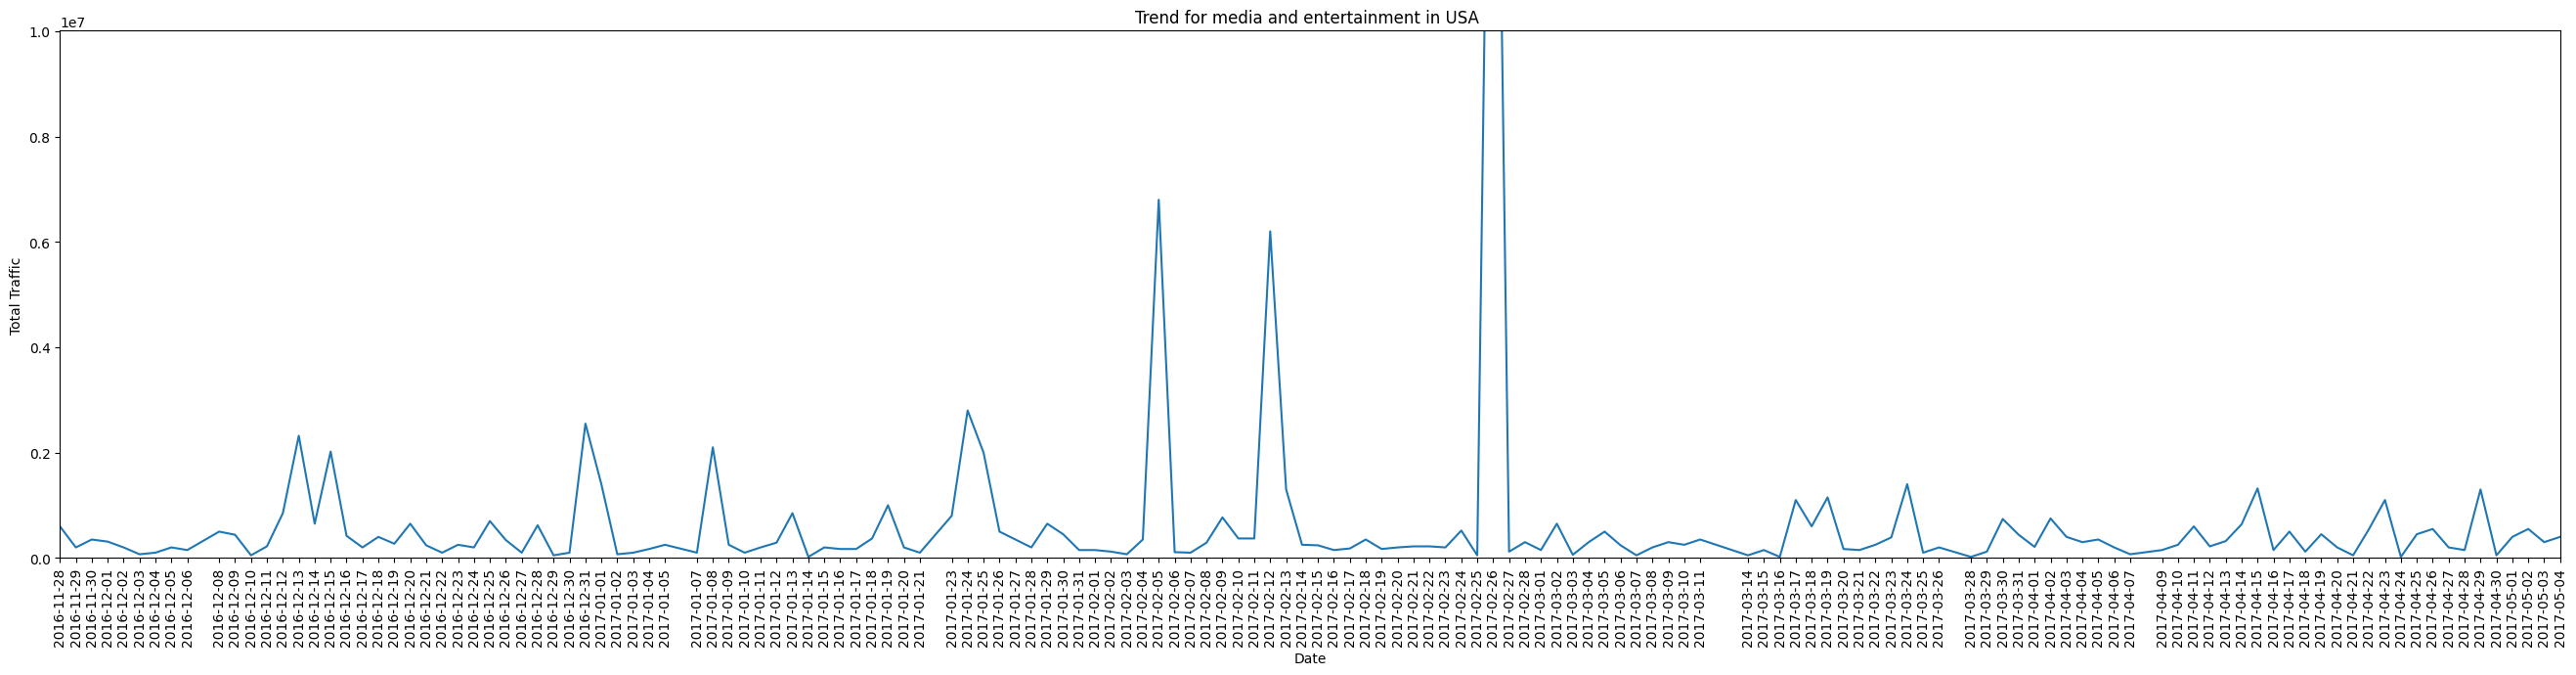

In [9]:
plt.figure(figsize=(33, 7))
sns.lineplot(data=specific_category_data, x='date', y='total_traffic')
plt.title(f"Trend for {detailed_category} in {country} ")
plt.xlabel("Date")
plt.ylabel("Total Traffic")
plt.xticks(specific_category_data['date'], rotation=90)

plt.ylim(0, maxTraffic+10000)

start_date = pd.to_datetime('2016-11-28')
end_date = pd.to_datetime('2017-05-04')

plt.xlim(start_date, end_date)

plt.show()